# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# 2. Data

In [2]:
attributes = pd.read_csv('attributes.csv', index_col=0)

In [3]:
attributes.head()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,1001.0,153.40,2019.0,0.27760,0.04904,0.6656,0.14710,0.01587,0.2654,0.3001,...,25.38,0.11840,0.006399,0.1622,0.2419,0.03003,0.4601,10.38,0.9053,17.33
1,1326.0,74.08,1956.0,0.07864,0.01308,0.1866,0.07017,0.01340,0.1860,0.0869,...,24.99,0.08474,0.005225,0.1238,0.1812,0.01389,0.2750,17.77,0.7339,23.41
2,1203.0,94.03,1709.0,0.15990,0.04006,0.4245,0.12790,0.02058,0.2430,0.1974,...,23.57,0.10960,0.006150,0.1444,0.2069,0.02250,0.3613,21.25,0.7869,25.53
3,386.1,27.23,567.7,0.28390,0.07458,0.8663,0.10520,0.01867,0.2575,0.2414,...,14.91,0.14250,0.009110,0.2098,0.2597,0.05963,0.6638,20.38,1.1560,26.50
4,1297.0,94.44,1575.0,0.13280,0.02461,0.2050,0.10430,0.01885,0.1625,0.1980,...,22.54,0.10030,0.011490,0.1374,0.1809,0.01756,0.2364,14.34,0.7813,16.67


In [4]:
attributes.columns

Index(['area_mean', 'area_se', 'area_worst', 'compactness_mean',
       'compactness_se', 'compactness_worst', 'concave points_mean',
       'concave points_se', 'concave points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst', 'diagnosis',
       'fractal_dimension_mean', 'fractal_dimension_se',
       'fractal_dimension_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst',
       'smoothness_mean', 'smoothness_se', 'smoothness_worst', 'symmetry_mean',
       'symmetry_se', 'symmetry_worst', 'texture_mean', 'texture_se',
       'texture_worst'],
      dtype='object')

In [5]:
clean_data = pd.read_csv('CleanData.csv', index_col = 0)

In [6]:
clean_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2.1 Feature Engineering

In [7]:
df = clean_data
encoded_data = pd.get_dummies(clean_data['diagnosis']).drop('M', axis = 1)
df.drop(['diagnosis'], axis=1, inplace = True)
data = pd.concat([df, encoded_data], axis = 1)

In [8]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
target = data[['B']]

In [10]:
attributes = data.drop('B', axis = 1)

## 2.2 Splitting Data into Train and Test Data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = attributes
y = target
#training set = 75% testing set = 25%
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size = 0.25, random_state = 10)

In [13]:
print(X_train.shape, y_train.shape)

(426, 30) (426,)


In [14]:
print(X_test.shape, y_test.shape)

(143, 30) (143,)


## 2.3 Scaling Data

In [15]:
# assuming data is normally distributed
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Imports for Evaluating Data

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_validate, learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest

# 4. Training

## 4.1 Dummy Classifier

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
model_dummy = DummyClassifier(random_state=10)
model_dummy.fit(X_train_scaled, y_train)
print(confusion_matrix(y_test, model_dummy.predict(X_test_scaled)))
print(classification_report(y_test, model_dummy.predict(X_test_scaled)))

[[ 0 52]
 [ 0 91]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.64      1.00      0.78        91

    accuracy                           0.64       143
   macro avg       0.32      0.50      0.39       143
weighted avg       0.40      0.64      0.49       143



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.1.2 Comments
The dummy classifier gives an accuracy score of 63%. This is a baseline score to compare suitable models to. 

## 4.2 Logistic Regression

### 4.2.1 Logistic Regression
During EDA the different features were identified to vary significantly in scale. As a consequence the training and the testing set for this model will be scaled prior to fitting and prediticting. 

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model_log = LogisticRegression(random_state = 10)
model_log.fit(X_train_scaled, y_train)
predictions_log = model_log.predict(X_test_scaled)

In [21]:
print(confusion_matrix(y_test, predictions_log))
print(classification_report(y_test, predictions_log))

[[50  2]
 [ 4 87]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.98      0.96      0.97        91

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### 4.2.2 Hypertuning for Best Parameters

In [22]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

parameters ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}# l1 lasso l2 ridge
model_log=LogisticRegression(random_state = 10)
model_log_grid=GridSearchCV(model_log,parameters,cv=10)
model_log_grid.fit(X_train_scaled,y_train)
predictions_logreg_grid = model_log_grid.predict(X_test_scaled)

print("Best parameters ",model_log_grid.best_params_)

Best parameters  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### 4.2.3 Logistic Regression with hypertuned parameters

In [23]:
model_log_best_params = LogisticRegression(random_state = 10, solver='liblinear', penalty='l2', C=0.1)
model_log_best_params.fit(X_train_scaled, y_train)
predictions_logBest = model_log_best_params.predict(X_test_scaled)
print(confusion_matrix(y_test,predictions_logBest))
print(classification_report(y_test, predictions_logBest))

[[51  1]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.98      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



### 4.2.4 Conclusion
The logistic model, prior to tuning hyperparameters, proved to be a good model as it has a f1-score of 94% and 96% percent for benign and malignant tumours respectively. After hyperparametet tuning, this score was imporved to 97% and 98% respectively. 

## 4.3 KNN

### 4.3.1 KNN with n_neighbors = 1

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model_knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_test)

In [27]:
print(confusion_matrix(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

[[47  5]
 [ 6 85]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.94      0.93      0.94        91

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



### 4.3.2 KNN with scaled data

In [28]:
model_knn_scaled = KNeighborsClassifier(n_neighbors=1)
model_knn_scaled.fit(X_train_scaled, y_train)
predictions_knn_scaled = model_knn_scaled.predict(X_test_scaled)

In [29]:
print(confusion_matrix(y_test, predictions_knn_scaled))
print(classification_report(y_test, predictions_knn_scaled))

[[51  1]
 [ 1 90]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.99      0.99      0.99        91

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



### 4.3.3 KNN - Determining best K

In [30]:
error_rate = []

for k in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_prediction = knn.predict(X_test)
    error_rate.append(np.mean(k_prediction != y_test))

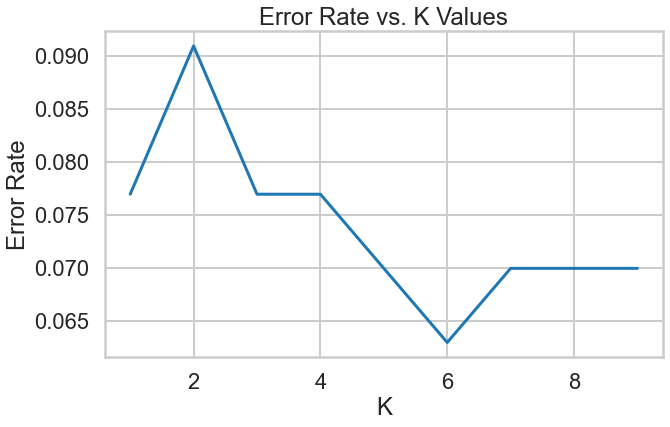

In [31]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(range(1,10),error_rate)
_ = plt.title('Error Rate vs. K Values')
_ = plt.xlabel('K')
_ = plt.ylabel('Error Rate')

### 4.3.4 KNN with n=2

In [32]:
knn_best_k = KNeighborsClassifier(n_neighbors=2)
knn_best_k.fit(X_train, y_train)
knn_best_k_predictions = knn_best_k.predict(X_test)
print(confusion_matrix(y_test, knn_best_k_predictions))
print(classification_report(y_test, knn_best_k_predictions))

[[48  4]
 [ 9 82]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        52
           1       0.95      0.90      0.93        91

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143



### 4.3.5 KNN with n=6

In [33]:
knn_best_k = KNeighborsClassifier(n_neighbors=6)
knn_best_k.fit(X_train, y_train)
knn_best_k_predictions = knn_best_k.predict(X_test)
print(confusion_matrix(y_test, knn_best_k_predictions))
print(classification_report(y_test, knn_best_k_predictions))

[[48  4]
 [ 5 86]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        52
           1       0.96      0.95      0.95        91

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### 4.3.6 KNN - Hypertuning Parameters

In [34]:
#parameters for KNN
parameters = {'leaf_size':list(range(1,15)), 'n_neighbors':list(range(1,15)), 'p':[1,2]}
knn_best_param = KNeighborsClassifier()
knn_best_param_grid = GridSearchCV(knn_best_param, parameters, cv=10)
knn_best_param_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'p': [1, 2]})

In [35]:
print("Best parameters: ",knn_best_param_grid.best_params_)

Best parameters:  {'leaf_size': 1, 'n_neighbors': 3, 'p': 2}


### 4.3.7 KNearest Neighbor model with hypertuned parameters

In [36]:
knn_hypertuned = KNeighborsClassifier(n_neighbors=3, leaf_size = 1, p=2)
knn_hypertuned.fit(X_train_scaled, y_train)
predictions_knn_hypertuned = knn_hypertuned.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions_knn_hypertuned))
print(classification_report(y_test, predictions_knn_hypertuned))

[[50  2]
 [ 0 91]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.98      1.00      0.99        91

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [37]:
knn_hypertuned = KNeighborsClassifier(n_neighbors=2, leaf_size = 1, p=2)
knn_hypertuned.fit(X_train_scaled, y_train)
predictions_knn_hypertuned = knn_hypertuned.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions_knn_hypertuned))
print(classification_report(y_test, predictions_knn_hypertuned))

[[51  1]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.98      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [38]:
knn_hypertuned = KNeighborsClassifier(n_neighbors=6, leaf_size = 1, p=2)
knn_hypertuned.fit(X_train_scaled, y_train)
predictions_knn_hypertuned = knn_hypertuned.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions_knn_hypertuned))
print(classification_report(y_test, predictions_knn_hypertuned))

[[51  1]
 [ 0 91]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      1.00      0.99        91

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



### 4.3.8 Conclusion
The gridsearch proved that n=3 is the optimal value for k, however this contradicts the error-rate plot. 

## 4.4 Support Vector Classifier

In [39]:
from sklearn.svm import SVC

### 4.4.1 Support Vector Classifier without scaling

In [40]:
model_svc = SVC(random_state = 10)
model_svc.fit(X_train, y_train)
predictions = model_svc.predict(X_test)

In [41]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[44  8]
 [ 3 88]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        52
           1       0.92      0.97      0.94        91

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



### 4.4.2 SVC with scaling of data

In [42]:
model_svc_scaled = SVC(random_state = 10)
model_svc_scaled.fit(X_train_scaled, y_train)
predictions_scaled = model_svc.predict(X_test_scaled)

In [43]:
print(confusion_matrix(y_test, predictions_scaled))
print(classification_report(y_test, predictions_scaled))

[[ 0 52]
 [ 0 91]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.64      1.00      0.78        91

    accuracy                           0.64       143
   macro avg       0.32      0.50      0.39       143
weighted avg       0.40      0.64      0.49       143



### 4.4.3 SVC - hypertuning parameters

In [44]:
X = attributes
y = target
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size = 0.25, random_state = 10)
parameters = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), parameters, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
predictions_grid_svc = grid.predict(X_test)
print('Best Parameters: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Best Parameters:  {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Estimator:  SVC(C=1, gamma=0.0001)


### 4.4.4 SVC with hypertuned parameters

In [46]:
model_svc = SVC(random_state = 10, C = 1, gamma = 0.0001, kernel = 'rbf')
model_svc.fit(X_train, y_train)
predictions_SVC_hypertuned = model_svc.predict(X_test)

In [47]:
print(confusion_matrix(y_test, predictions_SVC_hypertuned))
print(classification_report(y_test, predictions_SVC_hypertuned))

[[47  5]
 [ 5 86]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.95      0.95      0.95        91

    accuracy                           0.93       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



### 4.4.5 Conclusion

## 4.5 Random Forest Classifier

### 4.5.1 Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

In [49]:
X = attributes
y = target
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size = 0.25, random_state = 10)

In [50]:
model_rfc = RandomForestClassifier(n_estimators = 10, random_state = 10)
model_rfc.fit(X_train, y_train)
predictions_rfc = model_rfc.predict(X_test)

In [51]:
print(confusion_matrix(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))

[[51  1]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.98      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [52]:
from yellowbrick.model_selection import validation_curve

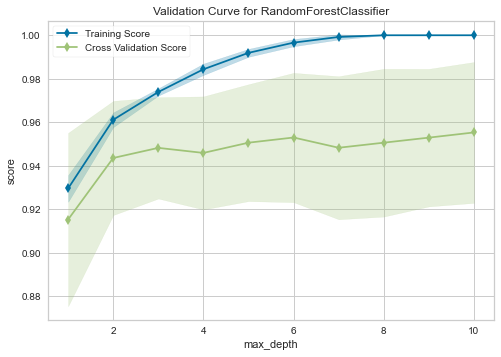

In [53]:
rfc_hypertuning = RandomForestClassifier(random_state = 10, 
                                         max_depth = None, n_jobs = 1, criterion = 'gini')
validation_curve = validation_curve(rfc_hypertuning, X = X_train, y= y_train,
                 param_name = 'max_depth',
                 n_jobs = -1,
                 param_range = np.arange(1,11),
                 cv = 10, 
                 scoring = 'accuracy'
                )

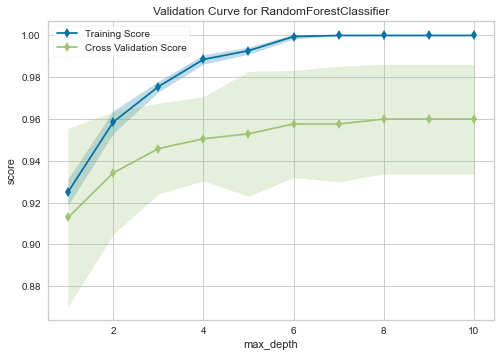

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=10,
                estimator=RandomForestClassifier(criterion='entropy', n_jobs=1,
                                                 random_state=10),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')

In [57]:
from yellowbrick.model_selection import validation_curve
rfc_hypertuning = RandomForestClassifier(random_state = 10, 
                                         max_depth = None, n_jobs = 1, criterion = 'entropy')
validation_curve(rfc_hypertuning, X_train, y_train,param_name = 'max_depth',n_jobs = -1,
                 param_range = np.arange(1,11),cv = 10,scoring = 'accuracy')

In [ ]:
feature_importance = model_rfc.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()